In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys

# TODO: change this to the path to your homework folder
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'NLP /Final project/ChineseHumorSentiment-master/data'
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'Shared drives', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))
# sys.path.append(GOOGLE_DRIVE_PATH)

In [3]:
import pandas as pd

In [4]:
train_set = pd.read_csv("drive/Shared drives/NLP Final Project/Dataset/balanced_train_task1.csv",encoding='utf8')
test_set = pd.read_csv("drive/Shared drives/NLP Final Project/Dataset/balanced_test_task1.csv",encoding='utf8')
train_set = train_set.drop(columns=['id', 'Unnamed: 0'])
test_set = test_set.drop(columns=['id', 'Unnamed: 0'])

In [5]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


## Preprocessing

In [6]:
! pip install transformers

     |████████████████████████████████| 4.0 MB 8.4 MB/s 
     |████████████████████████████████| 6.6 MB 52.4 MB/s 
     |████████████████████████████████| 77 kB 8.4 MB/s 
     |████████████████████████████████| 895 kB 64.0 MB/s 
     |████████████████████████████████| 596 kB 66.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
train_set

,joke,label
0,当他们全都被困在一起时，他们为什么称他们为“公寓”？,0
1,总有一个白痴比你指望的还要多。,0
2,我们的父母和祖父母是一个更大的威胁！,0
3,通过用细条培根覆盖任何切口和放牧，可以对猪进行轻微的皮肤移植。,0
4,有时我们不会想你。和它一起生活。,0
...,...,...
7995,四个食物组：快速，冷冻，速溶和巧克力。,0
7996,不要把我与事实混淆，我的思绪已经弥补了！,1
7997,财务科长对一雇员说：“你太太请求我们把你的月薪支票直接寄给她。” “为什么？” “她说取消中...,1
7998,如果橘子闻起来像鸡肉，为什么西红柿会变蓝？想一想！,0


In [8]:
import re
def custom_feature(text):
  feature1 = feature2 = feature3 = feature4 = feature5 = feature6 = feature7 = 0

  if len(re.findall(r"爸|妈|婆|公|学生|老师｜医生｜律师｜家长｜阿凡提", text)) > 0:
    feature1 = 0.5
  if len(re.findall(r"：｜:", text)) > 0:
    feature2 = 1.5
  if len(re.findall(r"、", text)) > 0:
    feature3 = 1
  if len(re.findall(r"？", text)) > 0:
    feature4 = 1
  if len(re.findall(r"!|！", text)) > 0:
    feature5 = 1
  feature6 = np.float(len(text)/100)
  return np.array([feature1,feature2,feature3,feature4,feature5, feature6])

In [9]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

example_text = train_set.iloc[3, 0]
bert_input = tokenizer(example_text,padding='max_length', max_length = 75, 
                       truncation=True, return_tensors="pt")

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

In [10]:
print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

tensor([[ 101, 6858, 6814, 4500, 5301, 3340, 1824, 3418, 6208, 4667,  818,  862,
         1147, 1366, 1469, 3123, 4288, 8024, 1377,  809, 2190, 4343, 6822, 6121,
         6768, 2544, 4638, 4649, 5502, 4919, 3490,  511,  102,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
example_text = tokenizer.decode(bert_input.input_ids[0])

print(example_text)

[CLS] 通 过 用 细 条 培 根 覆 盖 任 何 切 口 和 放 牧 ， 可 以 对 猪 进 行 轻 微 的 皮 肤 移 植 。 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [12]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
labels = {'true': 1,
          'false': 0
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [label for label in df['label']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 75, truncation=True,
                                return_tensors="pt") for text in df['joke']]
        self.custom_features = [custom_feature(text) for text in df['joke']]
    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]
    def get_batch_custom(self, idx):
        return self.custom_features[idx]
    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)
        batch_custom_feature = self.get_batch_custom(idx)
        return batch_texts, batch_custom_feature, batch_y

In [13]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-chinese')
        # self.dropout = nn.Dropout(dropout)
        self.rnn = nn.LSTM(774, 200, num_layers = 3, device='cuda', batch_first=False, bidirectional=True)
        self.linear = nn.Linear(400, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_id, mask, custom_feature):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        # dropout_output = self.dropout(pooled_output)
        
        pooled_output = torch.cat((pooled_output, custom_feature.float().to('cuda')), axis=1)
        # import pdb; pdb.set_trace()
        rnn_output, _ = self.rnn(pooled_output.view(len(pooled_output), 1, -1))
        linear_output = self.linear(rnn_output)
        final_layer = (linear_output).reshape((-1, 2))
        return final_layer

In [ ]:
from torch.optim import Adam
from tqdm import tqdm
from sklearn.metrics import f1_score
def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate, weight_decay=1e-3)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_custom_feature, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask, train_custom_feature)
                
                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_custom_feature, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask, val_custom_feature)

                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, train_set, test_set, LR, EPOCHS)

In [ ]:
train(model, train_set, test_set, LR, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
100%|██████████| 4000/4000 [04:12<00:00, 15.84it/s]


Epochs: 1 | Train Loss:  0.205                 | Train Accuracy:  0.849                 | Val Loss:  0.219                 | Val Accuracy:  0.817


100%|██████████| 4000/4000 [04:14<00:00, 15.74it/s]


Epochs: 2 | Train Loss:  0.196                 | Train Accuracy:  0.851                 | Val Loss:  0.216                 | Val Accuracy:  0.816


In [ ]:
torch.save(model,"drive/Shared drives/NLP Final Project/Lawrence model/lstm+bert1")

In [15]:
model = torch.load("drive/Shared drives/NLP Final Project/Lawrence model/lstm+bert1")

In [16]:
test_set

,joke,label
0,新法规意味着新监管机构的新工作岗位。,0
1,我有足够的钱让我度过余生，...除非我买东西。,1
2,昨天今天是明天，明天今天是昨天。,0
3,服务员！一位顾客喊道，广告中说你们自己制作混合咖啡，但是这根本不是混合咖啡的味。 服务员回答...,1
4,我认为你的问题是自尊心低。在输家中很常见。,0
...,...,...
1595,大一：你怎么迟到了？ 大二：你今天怎么没上课？ 大三：你上课吗？ 大四：你怎么上课去了？,1
1596,知道在短暂的时间点你有所作为，这是非常令人满意的。,0
1597,骑白马的不一定是王子，可能是唐僧；有翅膀的不一定是天使，也可能是鸟人！,1
1598,男脱下衣服给女友看二头肌说：这相当于五十公斤炸药。 又脱下裤子指着大腿说：这相当于一百公斤炸...,1


In [17]:
from sklearn.metrics import f1_score
def evaluate(model, val_data):
  val = Dataset(val_data)
  val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  
  model = model.cuda()
  predict = []
  true = []
  with torch.no_grad():
    for val_input, custom_feature, val_label in val_dataloader:
      val_label = val_label.to(device)
      mask = val_input['attention_mask'].to(device)
      input_id = val_input['input_ids'].squeeze(1).to(device)
      
      output = model(input_id, mask, custom_feature)

      pred = output.argmax(dim=1).cpu().detach().numpy()
      predict.append(pred[0])
      predict.append(pred[1])
      true.append(val_label.cpu().detach().numpy()[0])
      true.append(val_label.cpu().detach().numpy()[1])
  print(f"f1_score: {f1_score(true, predict, average='macro')}")

In [18]:
evaluate(model, test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


f1_score: 0.8324157701503239


In [19]:
val = Dataset(test_set)
val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
  
model = model.cuda()
predict = []
true = []
with torch.no_grad():
  for val_input, custom_feature, val_label in val_dataloader:
      val_label = val_label.to(device)
      mask = val_input['attention_mask'].to(device)
      input_id = val_input['input_ids'].squeeze(1).to(device)
      
      output = model(input_id, mask, custom_feature)

      pred = output.argmax(dim=1).cpu().detach().numpy()
      predict.append(pred[0])
      predict.append(pred[1])
      true.append(val_label.cpu().detach().numpy()[0])
      true.append(val_label.cpu().detach().numpy()[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


In [23]:
confusion_mat = np.zeros((2, 2))
for i in range(len(true)):
  confusion_mat[true[i], predict[i]] += 1

In [24]:
confusion_mat

array([[754.,  46.],
       [219., 581.]])

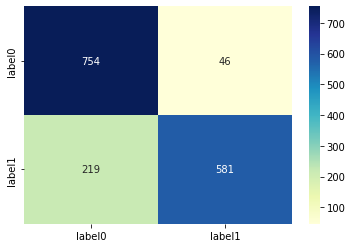

In [25]:
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

y_test = true
predic = predict

columns = ['label0', 'label1']

confm = confusion_matrix(y_test, predic)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="d")